In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!pip install gdown

import cv2
import json
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import gdown

# Get the Google Drive file ID from the URL
file_id = '184XVzbndbSUUiZBpagREOh3tO_ahLwbC'

# Download the file directly using the file ID
annotation_file_path_local = 'annotations.json'
gdown.download(id=file_id, output=annotation_file_path_local, quiet=False)


def load_annotations(annotation_file):
    with open(annotation_file, 'r') as f:
        annotations = json.load(f)
    return annotations

# Pass the local file path to load_annotations
annotations = load_annotations(annotation_file_path_local)

Downloading...
From: https://drive.google.com/uc?id=184XVzbndbSUUiZBpagREOh3tO_ahLwbC
To: /content/annotations.json
100%|██████████| 20.0M/20.0M [00:00<00:00, 86.7MB/s]


Downloading...
From: http://images.cocodataset.org/val2017/000000397133.jpg
To: /content/drive/MyDrive/val2017/000000397133.jpg
100%|██████████| 201k/201k [00:00<00:00, 3.11MB/s]


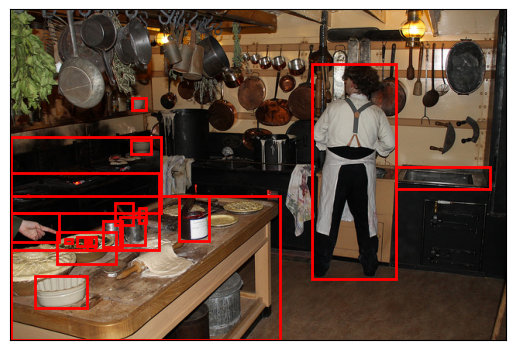

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os
import cv2
import gdown

# Assuming annotations are already loaded (e.g., 'annotations' is defined somewhere)

# Define the path to your Google Drive folder where images will be stored
drive_folder = "val2017"  # Replace with the actual folder name in your Drive
images_dir = os.path.join("/content/drive/MyDrive", drive_folder)  # Path to save images

# Create the directory in your Google Drive if it doesn't exist
os.makedirs(images_dir, exist_ok=True)

# Download the first image from the annotations
image_url = annotations['images'][0]['coco_url']
image_file_name = annotations['images'][0]['file_name']
image_path_local = os.path.join(images_dir, image_file_name)

gdown.download(url=image_url, output=image_path_local, quiet=False)

# Now, load the image using the local path
image = cv2.imread(image_path_local)

# Check if the image was loaded successfully
if image is None:
    print(f"Error: Could not load image from {image_path_local}")
else:
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for matplotlib

    # Create a figure and axes for plotting
    fig, ax = plt.subplots(1)

    # Display the image
    ax.imshow(image)

    # Remove axis ticks and labels
    ax.set_xticks([])  # Remove x-axis ticks
    ax.set_yticks([])  # Remove y-axis ticks
    ax.set_xticklabels([])  # Remove x-axis tick labels
    ax.set_yticklabels([])  # Remove y-axis tick labels

    # Add bounding boxes (same as before)
    for annotation in annotations['annotations']:
        if annotation['image_id'] == annotations['images'][0]['id']:
            bbox = annotation['bbox']
            rect = patches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3],
                                      linewidth=2, edgecolor='r', facecolor='none')
            ax.add_patch(rect)

    # Show the plot
    plt.show()


In [ ]:
import cv2

# Specify the path to the image (absolute or relative)
image_path = "/content/drive/MyDrive/val2017/000000000632.jpg"  # relative path
# Alternatively, an absolute path might look like:
# image_path = "/home/user/data/images/image1.jpg"

# Load the image using OpenCV
image = cv2.imread(image_path)

# Check if the image was loaded successfully
if image is None:
    print("Error: Unable to load image!")
else:
    print("Image loaded successfully.")
    plt.show()

Image loaded successfully.


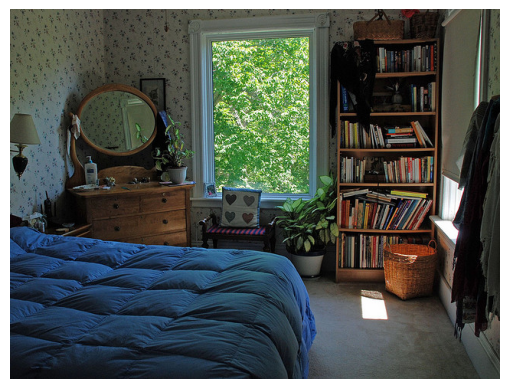

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the image in BGR format (default)
image_bgr = cv2.imread('/content/drive/MyDrive/val2017/000000000632.jpg')

# Check if the image was loaded correctly
if image_bgr is None:
    print("Error: Image not found or unable to load.")
else:
    # Convert BGR to RGB
    image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

    # Display the image
    plt.imshow(image_rgb)
    plt.axis('off')  # Hide axes
    plt.show()

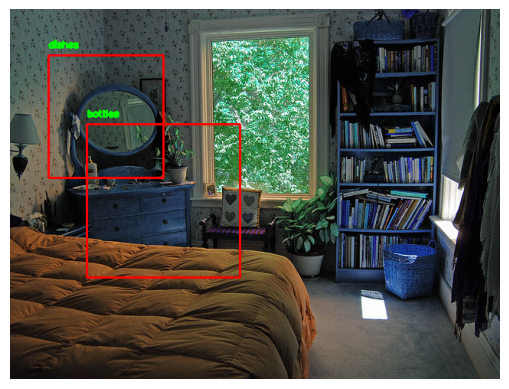

In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np # Import numpy

# Assume 'image' is a PIL.JpegImagePlugin.JpegImageFile object
# Convert the PIL Image to a NumPy array
image_np = np.array(image)

# Convert the NumPy array from RGB to BGR
image_rgb = cv2.cvtColor(image_np, cv2.COLOR_BGR2RGB)

# Example bounding boxes
bounding_boxes = [
    (50, 60, 200, 220, "dishes"),
    (100, 150, 300, 350, "bottles")
]

# Draw the bounding boxes and labels
for (x_min, y_min, x_max, y_max, label) in bounding_boxes:
    # Draw the rectangle (Red color)
    image_rgb = cv2.rectangle(image_rgb, (x_min, y_min), (x_max, y_max), (255, 0, 0), 2)  # Red color

    # Add label text above the bounding box
    font = cv2.FONT_HERSHEY_SIMPLEX
    image_rgb = cv2.putText(image_rgb, label, (x_min, y_min - 10), font, 0.4, (0, 255, 0), 2)  # Green text

# Display the image with bounding boxes and labels
plt.imshow(image_rgb)
plt.axis('off')  # Hide axes
plt.show()

In [ ]:
from PIL import Image, ImageDraw
mask = Image.new("L", image.size, 0)  # Start with a black mask (all pixels are 0)

# Draw a white circle on the mask (255 means fully visible)
draw = ImageDraw.Draw(mask)
center = (image.width // 2, image.height // 2)  # Center of the image
radius = min(image.width, image.height) // 4  # Radius of the circle
draw.ellipse([center[0] - radius, center[1] - radius, center[0] + radius, center[1] + radius], fill=255)

# Apply the mask to the image (will keep only the circular region)
masked_image = Image.composite(image, Image.new("RGB", image.size, (0, 0, 0)), mask)

# Show the masked image
masked_image.show()

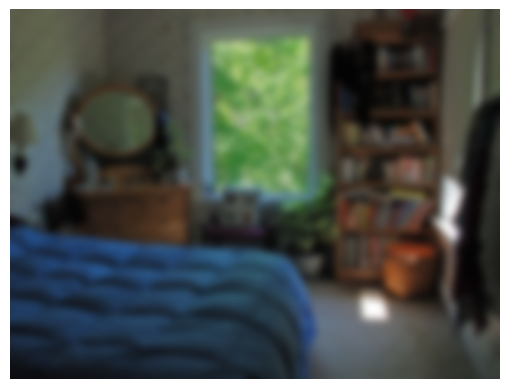

In [ ]:
from PIL import ImageFilter

# Apply a Gaussian Blur
blurred_image = image.filter(ImageFilter.GaussianBlur(radius=5))  # Increase radius for more blur
plt.imshow(blurred_image)
plt.show()

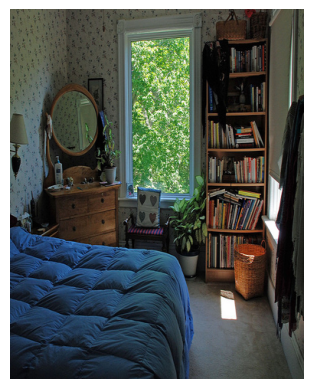

In [ ]:
scaled_image = image.resize((int(image.width * 0.6), int(image.height * 1.0)))
plt.imshow(scaled_image)
plt.axis('off')
plt.show()

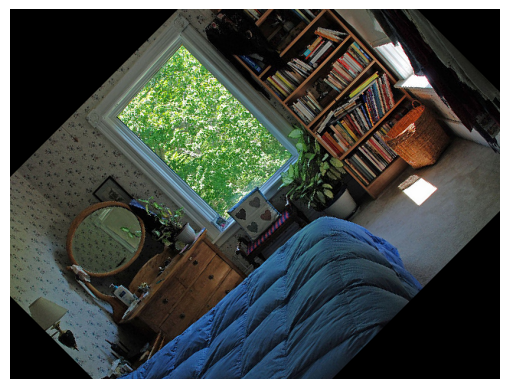

In [ ]:
rotated_image = image.rotate(45)
plt.imshow(rotated_image)
plt.axis('off')
plt.show()

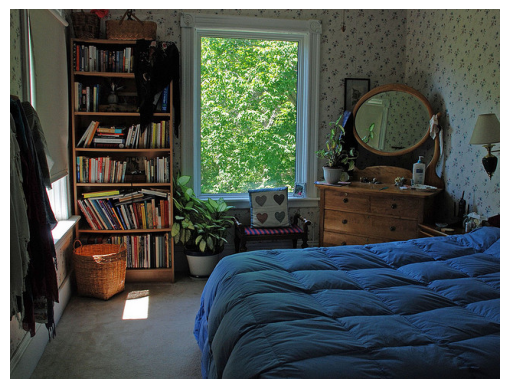

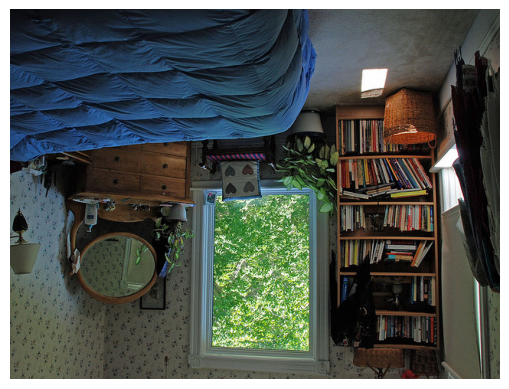

In [ ]:
flipped_image = image.transpose(Image.FLIP_LEFT_RIGHT)
plt.imshow(flipped_image)
plt.axis('off')
plt.show()

# Vertical flip
flipped_image_vert = image.transpose(Image.FLIP_TOP_BOTTOM)
plt.imshow(flipped_image_vert)
plt.axis('off')
plt.show()

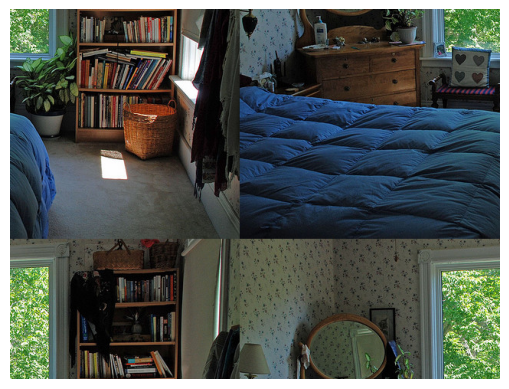

In [ ]:

from PIL import ImageChops
shifted_image = ImageChops.offset(image, 300, 300)
plt.imshow(shifted_image)
plt.axis('off')
plt.show()

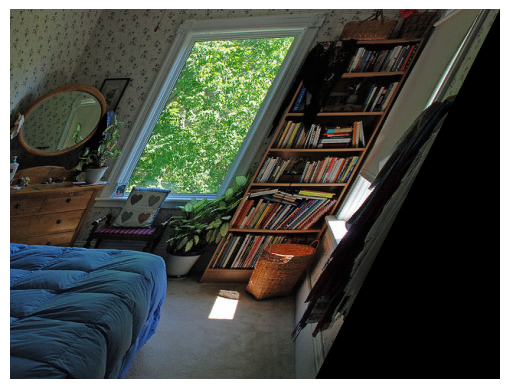

In [ ]:
from PIL import ImageTransform

# Apply a shear transformation
shear_matrix = [1, 0.5, 0, 0, 1, 0]  # Shear matrix
sheared_image = image.transform(image.size, Image.AFFINE, shear_matrix)
plt.imshow(sheared_image)
plt.axis('off')
plt.show()

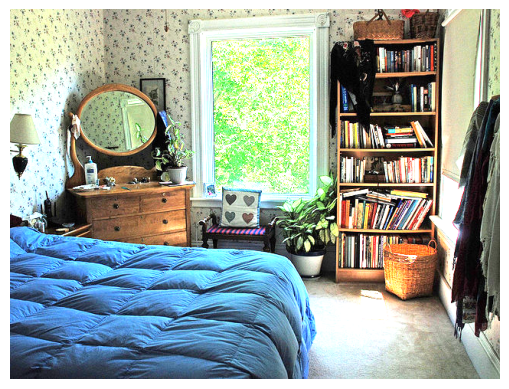

In [ ]:
from PIL import ImageEnhance

# Enhance the brightness
enhancer = ImageEnhance.Brightness(image)
brightened_image = enhancer.enhance(2.5)  # Brightness factor > 1 increases brightness
plt.imshow(brightened_image)
plt.axis('off')
plt.show()

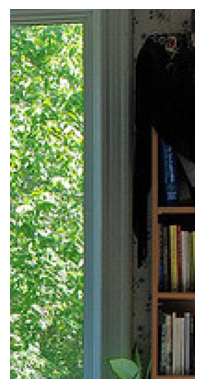

In [ ]:
crop_width = 100
crop_height = 200

# Randomly choose a top-left corner
left = np.random.randint(0, image.width - crop_width)
top = np.random.randint(0, image.height - crop_height)

# Define the box for cropping
crop_box = (left, top, left + crop_width, top + crop_height)
cropped_image = image.crop(crop_box)
plt.imshow(cropped_image)
plt.axis('off')
plt.show()

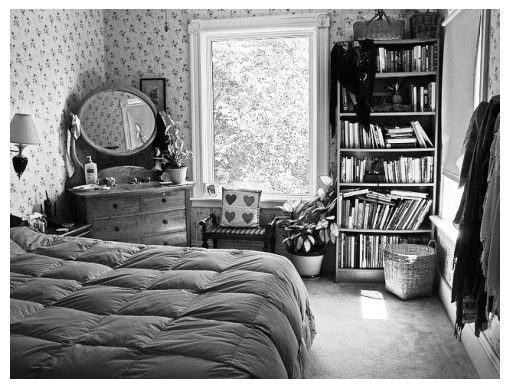

In [ ]:
import numpy as np

# Convert the image to grayscale
gray_image = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2GRAY)

# Apply histogram equalization
equalized_image = cv2.equalizeHist(gray_image)

# Convert back to RGB and show
equalized_image_rgb = cv2.cvtColor(equalized_image, cv2.COLOR_GRAY2RGB)
plt.imshow(equalized_image_rgb)
plt.axis('off')
plt.show()

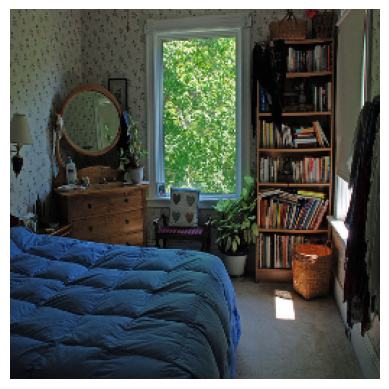

In [5]:

import albumentations as A
from albumentations.pytorch import ToTensorV2
import cv2
import matplotlib.pyplot as plt

# Define the transformation pipeline
transform = A.Compose([
    A.Resize(256, 256),
    A.HorizontalFlip(p=0.5),
    A.Rotate(limit=45, p=0.5),
    A.RandomBrightnessContrast(p=0.2),
])

# Load an image using OpenCV
image = cv2.imread('/content/drive/MyDrive/val2017/000000000632.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for Matplotlib

# Apply the transformations
transformed = transform(image=image)
transformed_image = transformed["image"]

# Display the transformed image using Matplotlib
plt.imshow(transformed_image)
plt.axis('off')  # Turn off axis labels
plt.show()


In [17]:
import os
import cv2
import numpy as np
import torch

def _group_annotations_by_image(self):
    image_id_to_annotations = {}
    for ann in self.annotations:
        image_id = ann['image_id']
        if image_id not in image_id_to_annotations:
            image_id_to_annotations[image_id] = []
        image_id_to_annotations[image_id].append(ann)
    return image_id_to_annotations

def _len_(self):
    return len(self.images)

def _getitem_(self, idx):
    image_info = self.images[idx]
    img_path = os.path.join(self.img_dir, image_info['val2017'])
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB

    # Get annotations
    image_id = image_info['id']
    annotations = self.image_id_to_annotations.get(image_id, [])

    # --- Print data before processing ---
    print(f"Image path: {img_path}")
    print(f"Image ID: {image_id}")
    print(f"Annotations: {annotations}")  # Print the original annotations data
    # ---

    boxes = []
    labels = []
    # Check if 'annotations' is not empty and is indeed a list
    if annotations and isinstance(annotations, list):
        for ann in annotations:
            # Check if 'ann' is a dictionary and has the key 'bbox' before accessing it
            if isinstance(ann, dict) and 'bbox' in ann:
                x, y, width, height = ann['bbox']
                boxes.append([x, y, x + width, y + height])
            # Check if 'ann' is a dictionary and has the key 'category_id' before accessing it
            if isinstance(ann, dict) and 'category_id' in ann:
                labels.append(ann['category_id'])
    else:
        # Handle the case where annotations are missing or invalid
        print(f"Warning: Invalid annotations for image index {idx}")
        boxes = np.array([])  # or some default value
        labels = np.array([])  # or some default value

    # --- Print data after processing ---
    print(f"Boxes: {boxes}")
    print(f"Labels: {labels}")
    # ---

    # Convert boxes and labels to numpy arrays for Albumentations
    boxes = np.array(boxes)
    labels = np.array(labels)

    # Apply transformations
    if self.transform:
        transformed = self.transform(image=image, bboxes=boxes, labels=labels)
        image = transformed['image']
        boxes = transformed['bboxes']
        labels = transformed['labels']
        plt.imshow(image)
        plt.title(f"Transformed Image (Index: {idx})")
        plt.axis('off')
        plt.show()

    # Convert to PyTorch tensors
    boxes = torch.tensor(boxes, dtype=torch.float32)

    # ... (rest of your code) ...